In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
def load_data(file_path):
    return pd.read_excel(file_path)
def prepare_data(df):
    X = df.drop(columns=['filename', 'species'])  # Feature matrix
    Y = df['species']  # Labels
    
    #splitting using train_test_split
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42)
    #retrun these datasets
    return X_train, X_test, Y_train, Y_test

def std_data(X_train, X_test):
    #Use Standard Scalar to transform the train and test separately
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.fit_transform(X_test)
    return X_train_scaled, X_test_scaled

def knn_classifier(X_train_scaled, Y_train, n_neighbours=3):
    # create instance
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    # trained using X_train_scaled and Y_train
    knn.fit(X_train_scaled, Y_train)
    return knn

def evaluate_model(knn,X_train_scaled, X_test_scaled, Y_train, Y_test):
    # knn built over the trained X and Y are used to predict the values for both X_trai_scaled and X_test_scaled
    y_train_pred = knn.predict(X_train_scaled)
    y_test_pred = knn.predict(X_test_scaled)
    
    #finding test accuracy and train accuracy
    train_accuracy = accuracy_score(Y_train, Y_train_pred)
    test_accuracy = accuracy_score(Y_test, Y_test_pred)
    
    # confusion matrix for test data set
    conf_matrix_test = confusion_matrix(Y_test, Y_test_pred)
    class_report_test = classification_report(Y_test, Y_test_pred, zero_division =1)
    
    # confusion matrix for train data set
    conf_matrix_train = confusion_matrix(Y_train, Y_train_pred)
    class_report_train = classification_report(Y_train, Y_train_pred, zero_division =1)
    
    print(f"Training Accuracy: {train_accuracy:.2f}")
    print(f"Testing Accuracy: {test_accuracy:.2f}")
    
    # for test data
    print("Confusion Matrix for test data set:")
    print(conf_matrix_test)
    print("Classification Report for test data set:")
    print(class_report_test)
    
    # for train data
    print("Confusion Matrix for train data set:")
    print(conf_matrix_train)
    print("Classification Report for train data set:")
    print(class_report_train)
    

file_path = 'C:\\Users\\NEW\\Documents\\Python Scripts\\bird_species_features.xlsx'
df = load_data(file_path)
# for dividing data
X_train, X_test, Y_train, Y_test = prepare_data(df)
   
# standardize 
X_train_scaled, X_test_scaled = standardize_data(X_train, X_test)
   
# train model
knn = train_knn_classifier(X_train_scaled, Y_train, n_neighbors=3)
    
#evaluate model
evaluate_model(knn, X_train_scaled, X_test_scaled, Y_train, Y_test)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# Function to read Excel data
def read_excel(excel_path, sheet_name="Purchase data"):
    return pd.read_excel(excel_path, sheet_name=sheet_name)

# Function to extract matrix A from the dataframe
def get_mat_A(dataframe):
    return dataframe[['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)']].to_numpy()

# Function to extract matrix C from the dataframe
def get_mat_C(dataframe):
    return dataframe[['Payment (Rs)']].to_numpy()

# Function to compute the rank of a matrix
def find_rank(matrix):
    return np.linalg.matrix_rank(matrix)

# Function to compute the pseudo-inverse of a matrix
def pseudo_inv(matrix):
    return np.linalg.pinv(matrix)

# Function to find matrix X using matrix A and C
def find_X(inv_A, C):
    return np.dot(inv_A, C)

# Function to perform binary classification based on matrix values
def bin_classify(matrix, threshold=200):
    return [1 if value >= threshold else 0 for value in matrix]

# Function to calculate customer classification
def classify_customer(arr, Y):
    val = np.dot(arr, Y)
    classification = round(val)
    if classification == 1:
        print("RICH")
    elif classification == 0:
        print("POOR")
    else:
        print("NONE")

# Function to calculate regression metrics
def calculate_regression_metrics(actual, predicted):
    mse = mean_squared_error(actual, predicted)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((actual - predicted) / actual)) * 100
    r2 = r2_score(actual, predicted)
    
    return mse, rmse, mape, r2

# Main code execution
if __name__ == "__main__":
    path = '/content/drive/MyDrive/Colab Notebooks/Lab Session Data.xlsx'
    df1 = read_excel(path)

    # Prepare matrices
    A = get_mat_A(df1)
    C = get_mat_C(df1)

    # Dimensionality and rank
    print("Dimensionality:", A.shape[1])
    print("Number of vectors:", A.shape[0])
    print("Rank of A:", find_rank(A))

    # Pseudo-inverse calculation
    A_inv = pseudo_inv(A)
    print("Pseudo-inverse of A:\n", A_inv)

    # Cost calculation
    X = find_X(A_inv, C)
    print("Cost:\n", X)

    # Calculate regression metrics
    mse, rmse, mape, r2 = calculate_regression_metrics(C, np.dot(A, X))
    print(f"MSE: {mse:.2f}, RMSE: {rmse:.2f}, MAPE: {mape:.2f}%, R²: {r2:.2f}")


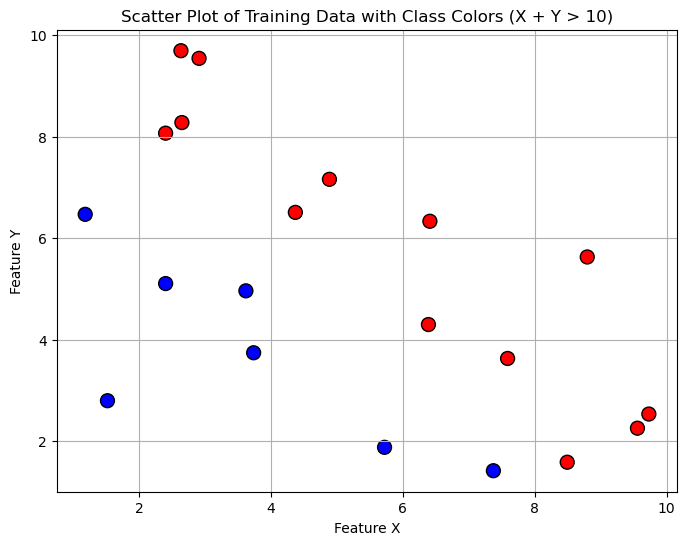

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def generate_data(seed=42, num_points=20, lower_bound=1, upper_bound=10):
    #Generate random data points for X and Y within specified bounds.
    #Returns:
    #- X (ndarray): Array of random values for feature X.
    #- Y (ndarray): Array of random values for feature Y.
    np.random.seed(seed)
    X = np.random.uniform(lower_bound, upper_bound, num_points)
    Y = np.random.uniform(lower_bound, upper_bound, num_points)
    return X, Y

def assign_classes(X, Y, threshold=10):
    #Assign classes based on the condition X + Y > threshold and returns array of 1s and 0s
    return np.where(X + Y > threshold, 1, 0)

def get_colors(classes):
    #Get color mappings for classes.
    #- colors (ndarray): Array of color mappings ('blue' or 'red').
    return np.where(classes == 0, 'blue', 'red')

def plot_data(X, Y, colors):
    #Plot a scatter plot of the data with class colors.
    #- colors (ndarray): Array of color mappings for the points.
    plt.figure(figsize=(8, 6))
    plt.scatter(X, Y, c=colors, s=100, edgecolor='black')
    plt.title("Scatter Plot of Training Data with Class Colors (X + Y > 10)")
    plt.xlabel("Feature X")
    plt.ylabel("Feature Y")
    plt.grid(True)
    plt.show()

def main():
    # Generate data
    X, Y = generate_data()
    
    # Assign classes
    classes = assign_classes(X, Y)
    
    # Get colors based on classes
    colors = get_colors(classes)
    
    # Plot the data
    plot_data(X, Y, colors)

if __name__ == "__main__":
    main()


C:\Users\NEW\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


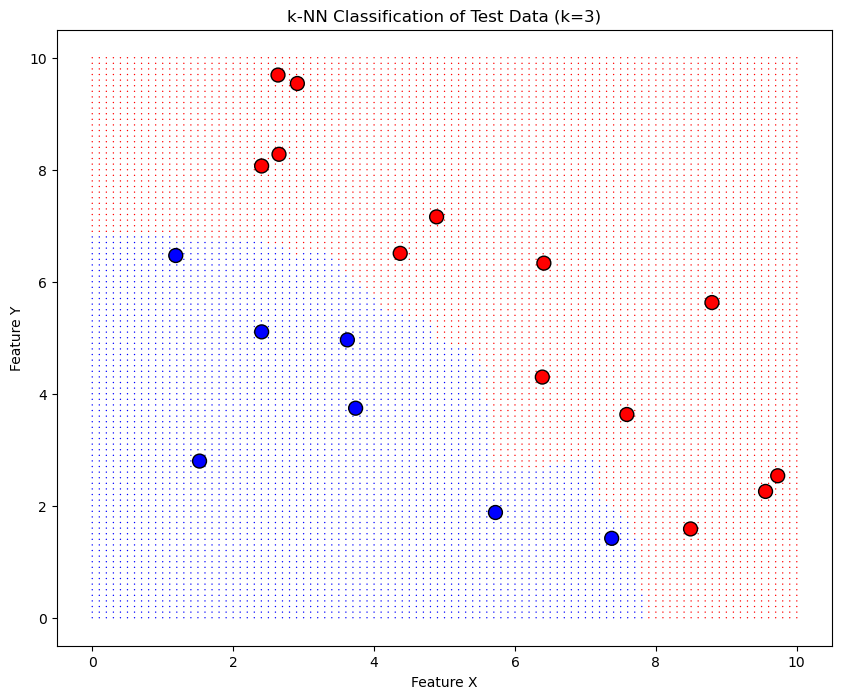

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
def random_points():
# Generate 20 random data points for X and Y between 1 and 10 (Training data)
    np.random.seed(42)
    X_train = np.random.uniform(1, 10, 20)
    Y_train = np.random.uniform(1, 10, 20)
    return X_train, Y_train
def define_class(X_train, Y_train):
# Assign classes based on the condition X + Y > 10
    classes_train = np.where(X_train + Y_train > 10, 1, 0)
    return classes_train

def prepare_data(X_train, Y_train):
    # Prepare training data for k-NN
    train_data = np.column_stack((X_train, Y_train))

    # Generate test set data: X and Y values ranging from 0 to 10 with increments of 0.1
    x_test = np.arange(0, 10.1, 0.1)
    y_test = np.arange(0, 10.1, 0.1)
    X_test, Y_test = np.meshgrid(x_test, y_test)
    X_test = X_test.ravel()
    Y_test = Y_test.ravel()

    # Prepare test data for classification
    test_data = np.column_stack((X_test, Y_test))
    
    return train_data, test_data

def knn_train(train_data, classes_train):
    # Initialize k-NN classifier with k=3
    knn = KNeighborsClassifier(n_neighbors=3)

    # Fit the model using the training data
    knn.fit(train_data, classes_train)
    return knn

def eval_and_plot(knn,test_data):
    # Predict the class of test data
    predicted_classes = knn.predict(test_data)

    # Colors for predicted classes (0 -> blue, 1 -> red)
    colors = np.where(predicted_classes == 0, 'blue', 'red')

    # Create scatter plot for test data
    plt.figure(figsize=(10, 8))
    plt.scatter(X_test, Y_test, c=colors, s=1, edgecolor='none')

    # Overlay training data points with larger markers
    plt.scatter(X_train, Y_train, c=np.where(classes_train == 0, 'blue', 'red'), s=100, edgecolor='black', marker='o')

    # Plot details
    plt.title("k-NN Classification of Test Data (k=3)")
    plt.xlabel("Feature X")
    plt.ylabel("Feature Y")
    #plt.grid(True)
    plt.show()

def main():
    X_train, Y_train = random_points()
    classes_train = define_class(X_train, Y_train)
    train_data, test_data = prepare_data(X_train, Y_train)
    eval_and_plot(knn_train(train_data, classes_train),test_data)

if __name__=="__main__":
    main()

C:\Users\NEW\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


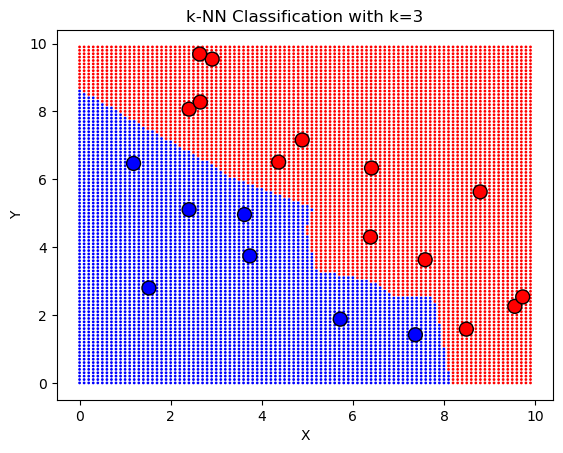

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
def random_points():
# Generate 20 random data points for X and Y between 1 and 10 (Training data)
    np.random.seed(42)
    X_train = np.random.uniform(1, 10, 20)
    Y_train = np.random.uniform(1, 10, 20)
    return X_train, Y_train
def define_class(X_train, Y_train):
# Assign classes based on the condition X + Y > 10
    classes_train = np.where(X_train + Y_train > 10, 1, 0)
    return classes_train

def prepare_data(X_train, Y_train):
    # Prepare training data for k-NN
    train_data = np.column_stack((X_train, Y_train))

    # Generate test set data: X and Y values ranging from 0 to 10 with increments of 0.1
    x_test = np.arange(0, 10.1, 0.1)
    y_test = np.arange(0, 10.1, 0.1)
    X_test, Y_test = np.meshgrid(x_test, y_test)
    X_test = X_test.ravel()
    Y_test = Y_test.ravel()

    # Prepare test data for classification
    test_data = np.column_stack((X_test, Y_test))
    
    return train_data, test_data

def knn_train(train_data, classes_train,n_neighbors):
    # Initialize k-NN classifier with k=3
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)

    # Fit the model using the training data
    knn.fit(train_data, classes_train)
    return knn

def eval_and_plot(knn,test_data):
    # Predict the class of test data
    predicted_classes = knn.predict(test_data)

    # Colors for predicted classes (0 -> blue, 1 -> red)
    colors = np.where(predicted_classes == 0, 'blue', 'red')

    # Create scatter plot for test data
    plt.figure(figsize=(10, 8))
    plt.scatter(X_test, Y_test, c=colors, s=1, edgecolor='none')

    # Overlay training data points with larger markers
    plt.scatter(X_train, Y_train, c=np.where(classes_train == 0, 'blue', 'red'), s=100, edgecolor='black', marker='o')

    # Plot details
    plt.title("k-NN Classification of Test Data ")
    plt.xlabel("Feature X")
    plt.ylabel("Feature Y")
    #plt.grid(True)
    plt.show()

def main():
    X_train, Y_train = random_points()
    classes_train = define_class(X_train, Y_train)
    train_data, test_data = prepare_data(X_train, Y_train)
    # different values for k
    for k in range(1,10):
        eval_and_plot(knn_train(train_data, classes_train,k),test_data)

if __name__=="__main__":
    main()

graph


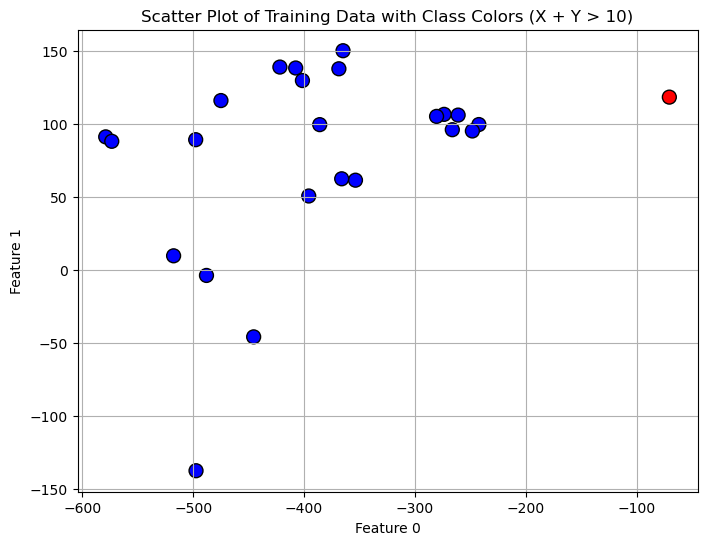

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def load_data(filepath):
    # Load data from Excel
    df = pd.read_excel(filepath)
    return np.array(df['feature_0']), np.array(df['feature_1'])

def assign_classes(features1, features2, threshold=10):
    # Assign classes based on threshold
    return np.where(features1 + features2 > threshold, 1, 0)

def plot_scatter(features1, features2, classes):
    # Plot scatter with colors for classes
    colors = np.where(classes == 0, 'blue', 'red')
    plt.figure(figsize=(8, 6))
    plt.scatter(features1, features2, c=colors, s=100, edgecolor='black')
    plt.title("Scatter Plot of Training Data with Class Colors")
    plt.xlabel("Feature 0")
    plt.ylabel("Feature 1")
    plt.grid(True)
    plt.show()

def main():
    # Load data, assign classes, and plot
    features1, features2 = load_data('bird_species_features_sample100.xlsx')
    classes = assign_classes(features1, features2)
    plot_scatter(features1, features2, classes)

if __name__ == "__main__":
    main()


C:\Users\NEW\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


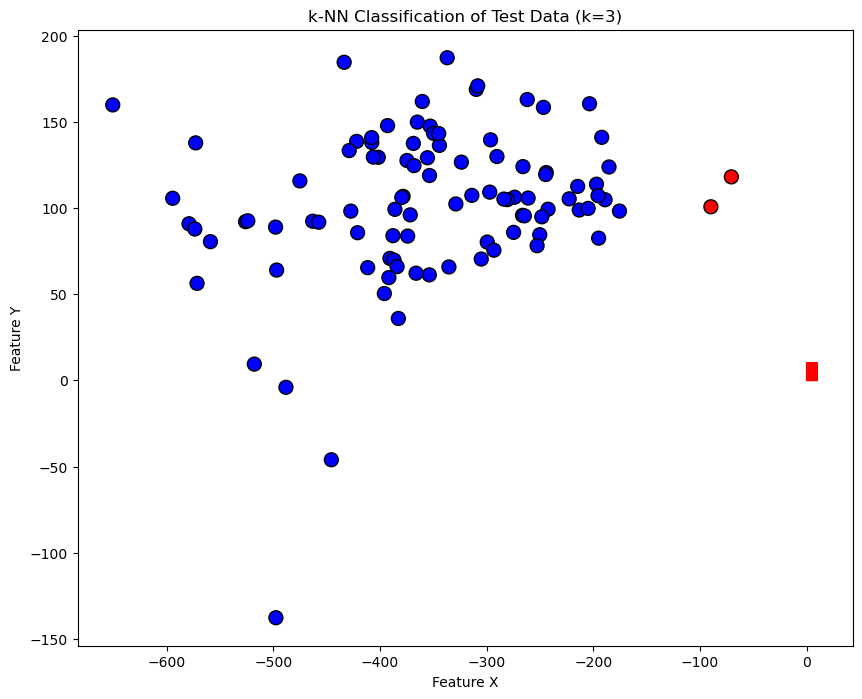

In [21]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

def load_data(file_path):
    """Loads data from an Excel file and returns feature arrays."""
    df = pd.read_excel(file_path)
    arr_features1 = np.array(df['feature_0'])
    arr_features2 = np.array(df['feature_1'])
    return arr_features1, arr_features2

def assign_classes(arr1, arr2):
    """Assigns classes based on the sum of two features."""
    return np.where(arr1 + arr2 > 10, 1, 0)

def prepare_training_data(arr1, arr2):
    """Prepares the training data matrix from two feature arrays."""
    return np.column_stack((arr1, arr2))

def perform_random_search(train_data, train_classes):
    """Performs Randomized Search to find the best k for k-NN."""
    knn = KNeighborsClassifier()
    param_grid = {'n_neighbors': np.arange(1, 21)}
    random_search = RandomizedSearchCV(knn, param_grid, n_iter=10, cv=5, random_state=42)
    random_search.fit(train_data, train_classes)
    return random_search.best_params_['n_neighbors'], random_search.best_score_

def perform_grid_search(train_data, train_classes):
    """Performs Grid Search to find the best k for k-NN."""
    knn = KNeighborsClassifier()
    param_grid = {'n_neighbors': np.arange(1, 21)}
    grid_search = GridSearchCV(knn, param_grid, cv=5)
    grid_search.fit(train_data, train_classes)
    return grid_search.best_params_['n_neighbors'], grid_search.best_score_

def main():
    # Load data
    arr_features1, arr_features2 = load_data('bird_species_features_sample100.xlsx')

    # Assign classes and prepare training data
    classes_train = assign_classes(arr_features1, arr_features2)
    train_data = prepare_training_data(arr_features1, arr_features2)

    # Perform Randomized Search
    best_k_rand, best_score_rand = perform_random_search(train_data, classes_train)
    print(f"Randomized Search Best k: {best_k_rand}")
    print(f"Randomized Search Best Score: {best_score_rand:.4f}")

    # Perform Grid Search
    best_k_grid, best_score_grid = perform_grid_search(train_data, classes_train)
    print(f"Grid Search Best k: {best_k_grid}")
    print(f"Grid Search Best Score: {best_score_grid:.4f}")

if __name__ == "__main__":
    main()


Best k value: 1
Best cross-validation score: 0.9600


C:\Users\NEW\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\NEW\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\NEW\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior 

In [ ]:
#question 2
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

data1 = pd.read_excel('IRCTC Stock Price.xlsx')
price = data1.copy()
price['Predicted_Price'] = price['Price'].shift(1)
price = price.dropna()

realprice = price['Price'].values
assumedprice = price['Predicted_Price'].values

mse = mean_squared_error(realprice, assumedprice)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(realprice, assumedprice)
r2 = r2_score(realprice, assumedprice)

print("mse is:",mse)
print("rmse is:",rmse)
print("mape is:",mape)
print("r2 score is:",r2)